# Explorartory Data Analysis

## Initial Approach with Kaggle dataset

- We aim to explore patterns and get some insights from the dataset of [Recruit Restaurant Visitor Forecasting](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting) Kaggle competition. The data was collected from two different sites.

- It would also help us understand the structure of reservations, visits, and other data of restaurants, which would further allow us to build synthetic dataset to simulate the case for GoodOldDays restaurant.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
# import data
kaggle_ds_dir = "../data/external/"
air_reserve_df = pd.read_csv(kaggle_ds_dir + "air_reserve.csv")
air_store_info_df = pd.read_csv(kaggle_ds_dir + "air_store_info.csv")
air_visit_df = pd.read_csv(kaggle_ds_dir + "air_visit_data.csv")
date_info_df = pd.read_csv(kaggle_ds_dir + "date_info.csv")
hpg_reserve_df = pd.read_csv(kaggle_ds_dir + "hpg_reserve.csv")
hpg_store_info_df = pd.read_csv(kaggle_ds_dir + "hpg_store_info.csv")
store_id_relation_df = pd.read_csv(kaggle_ds_dir + "store_id_relation.csv")
#sample_submission_df = pd.read_csv(kaggle_ds_dir + "sample_submission.csv")

air_reserve_df.name = "air_reserve_df"
air_store_info_df.name = "air_store_info_df"
air_visit_df.name = "air_visit_df"
date_info_df.name = "date_info_df"
hpg_reserve_df.name = "hpg_reserve_df"
hpg_store_info_df.name = "hpg_store_info_df"
store_id_relation_df.name = "store_id_relation_df"
#sample_submission_df.name = "sample_submission_df"

In [18]:
# check for missing values
dataframes = [air_reserve_df, air_store_info_df, air_visit_df,date_info_df, hpg_reserve_df, hpg_store_info_df, store_id_relation_df]

for df in dataframes:
    print(df.name)
    print("Shape :{}".format(df.shape))
    print("First 3 rows of dataset:")
    print(df.head(3))
    df.info()
    print("Missing_Values:")
    print(round(df.isna().sum() / len(df), 2))
    print("Stats:")
    print(df.describe())
    print("="*100)


air_reserve_df
Shape :(92378, 4)
First 3 rows of dataset:
           air_store_id      visit_datetime    reserve_datetime  \
0  air_877f79706adbfb06 2016-01-01 19:00:00 2016-01-01 16:00:00   
1  air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00   
2  air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   air_store_id      92378 non-null  object        
 1   visit_datetime    92378 non-null  datetime64[ns]
 2   reserve_datetime  92378 non-null  datetime64[ns]
 3   reserve_visitors  92378 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB
Missing_Values:
air_store_id        0.0
visit_datetime      0.0
reserve_datetime    

Here we get some basic info about each dataset. Note that none of the dataset has missing values. As dates are not in datetime Dtype, we converts them to to pandas datetime objects.

In [17]:
for df in dataframes:
    for col in df.columns:
        if "date" in col:
            df[col] = pd.to_datetime(df[col])    

Now we proceed with explorotary data analysis of each dataset separately.

1. HPG site

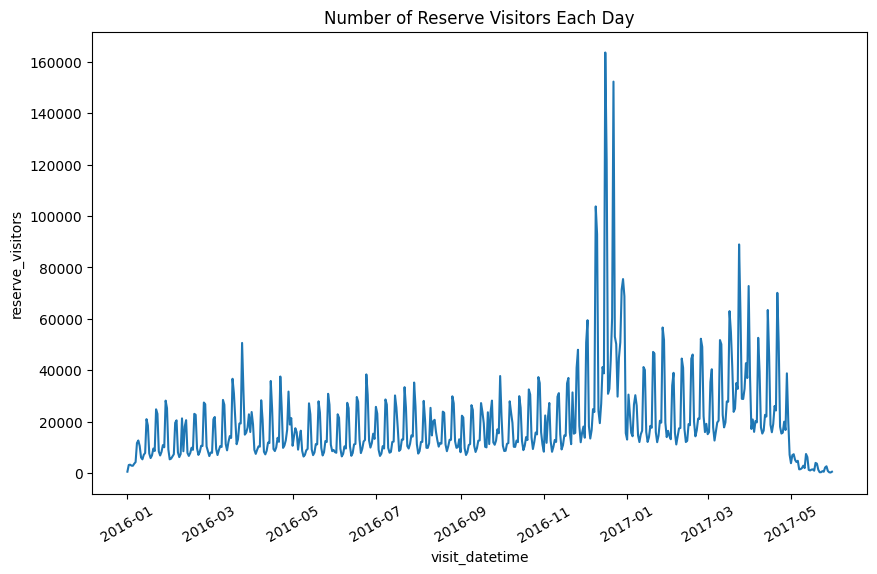

In [105]:
plt.figure(figsize=(10,6))
sns.lineplot(data=hpg_reserve_df.groupby(hpg_reserve_df["visit_datetime"].dt.date)["reserve_visitors"].sum().reset_index(), x="visit_datetime", y="reserve_visitors")
plt.xticks(rotation=30)
plt.title("Number of Reserve Visitors Each Day")
plt.show()

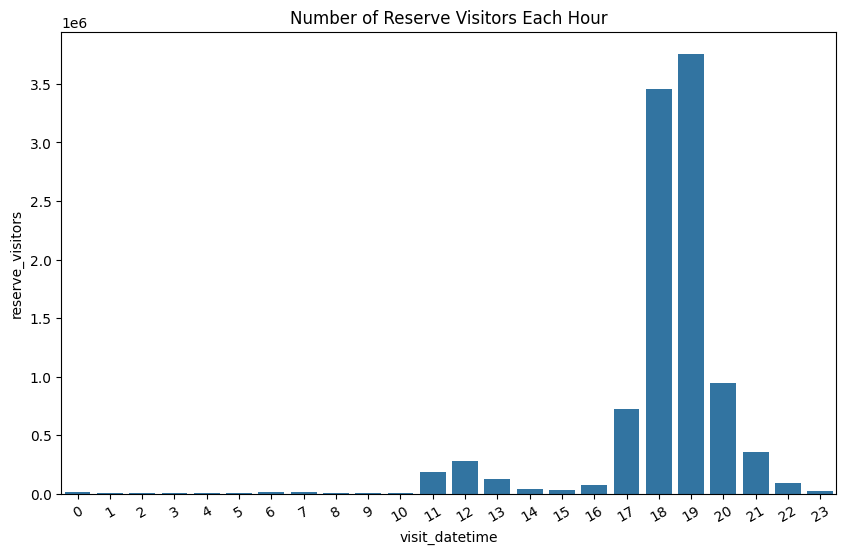

In [106]:
plt.figure(figsize=(10,6))
sns.barplot(data=hpg_reserve_df.groupby(hpg_reserve_df["visit_datetime"].dt.hour)["reserve_visitors"].sum().reset_index(), x="visit_datetime", y="reserve_visitors")
plt.xticks(rotation=30)
plt.title("Number of Reserve Visitors Each Hour")
plt.show()

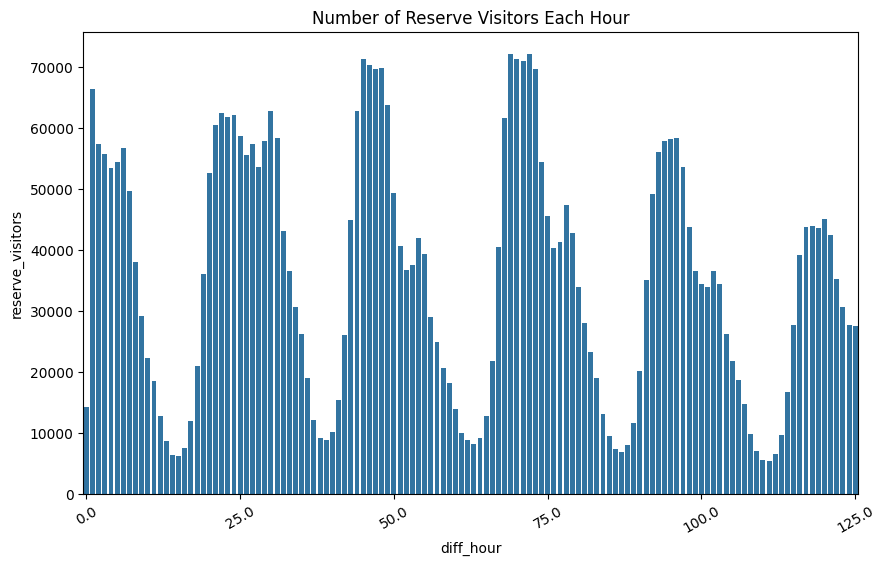

In [107]:
hpg_reserve_df["diff_hour"] = (hpg_reserve_df["visit_datetime"] - hpg_reserve_df["reserve_datetime"]).dt.total_seconds() / 3600
hpg_reserve_filtered = hpg_reserve_df[(hpg_reserve_df["diff_hour"] <= 125)] 

plt.figure(figsize=(10,6))
sns.barplot(data=hpg_reserve_filtered.groupby(hpg_reserve_filtered["diff_hour"])["reserve_visitors"].sum().reset_index(), x="diff_hour", y="reserve_visitors")
plt.xticks(rotation=30)
plt.xticks(range(0, 126, 25))
plt.title("Number of Reserve Visitors Each Hour")
plt.show()

2. Air site

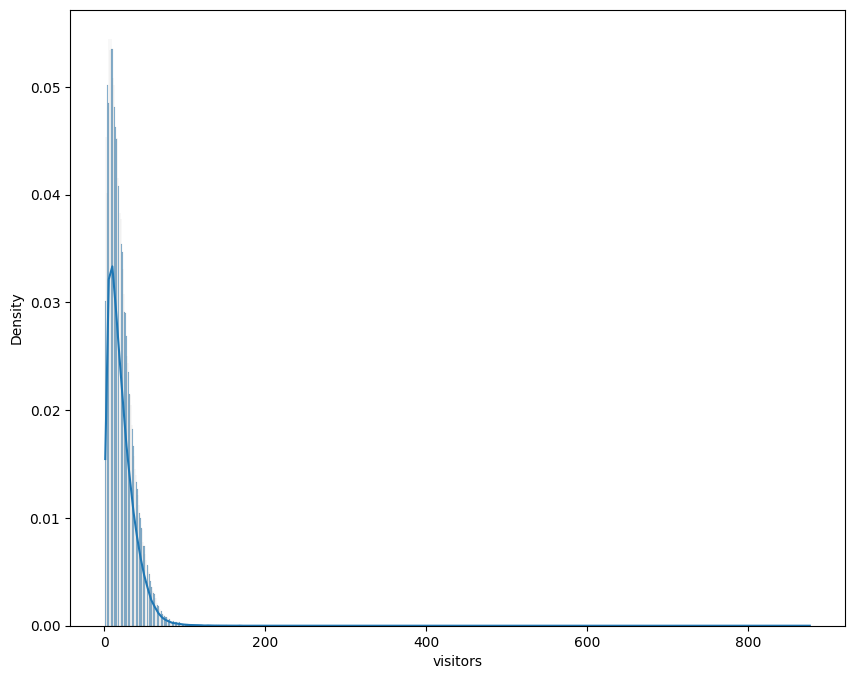

In [77]:
plt.figure(figsize=(10,8))
sns.histplot(air_visit_df['visitors'], kde=True, stat="density")
plt.show()

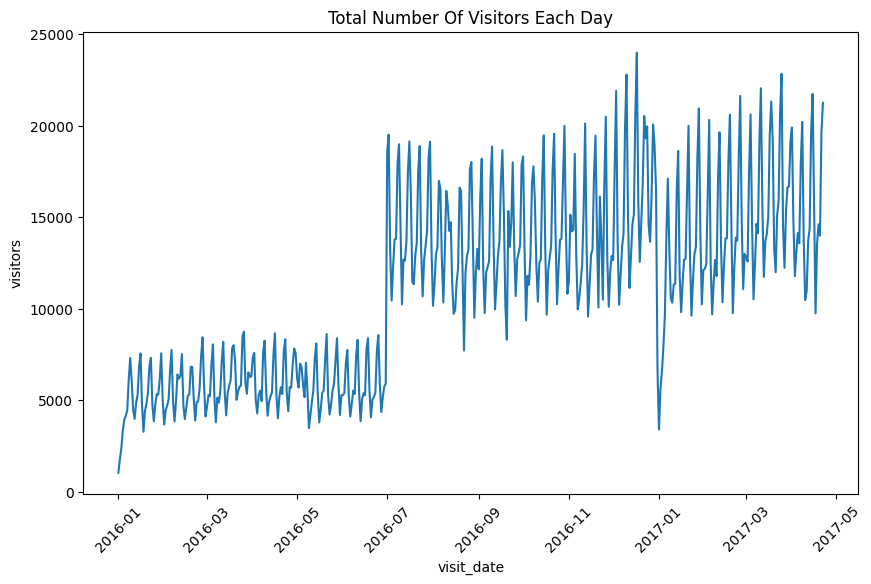

In [48]:
plt.figure(figsize=(10,6))
sns.lineplot(data=air_visit_df.groupby("visit_date")["visitors"].sum().reset_index(), x="visit_date", y="visitors")
plt.xticks(rotation=45)
plt.title("Total Number Of Visitors Each Day")
plt.show()

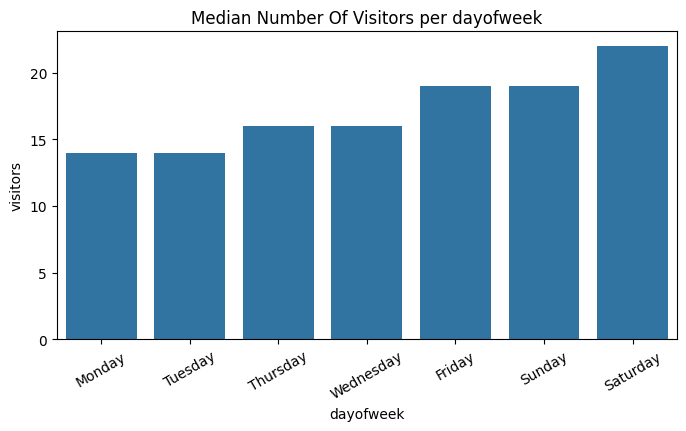

In [64]:
air_visit_df["dayofweek"] = [day.day_name() for day in air_visit_df["visit_date"]]
plt.figure(figsize=(8,4))
sns.barplot(data=air_visit_df.groupby("dayofweek")["visitors"].median().reset_index().sort_values("visitors"), x="dayofweek", y="visitors")
plt.xticks(rotation=30)
plt.title("Median Number Of Visitors Each dayofweek")
plt.show()

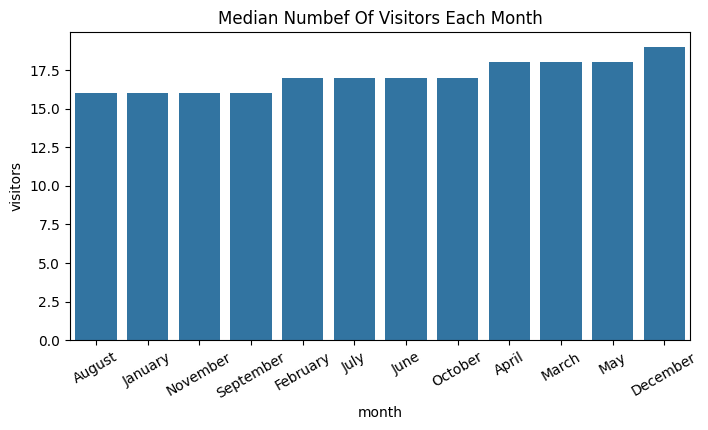

In [65]:
air_visit_df["month"] = [day.month_name() for day in air_visit_df["visit_date"]]
# Plot results
plt.figure(figsize=(8,4))
sns.barplot(data=air_visit_df.groupby("month")["visitors"].median().reset_index().sort_values("visitors"), x="month", y="visitors")
plt.xticks(rotation=30)
plt.title("Median Numbef Of Visitors Each Month")
plt.show()

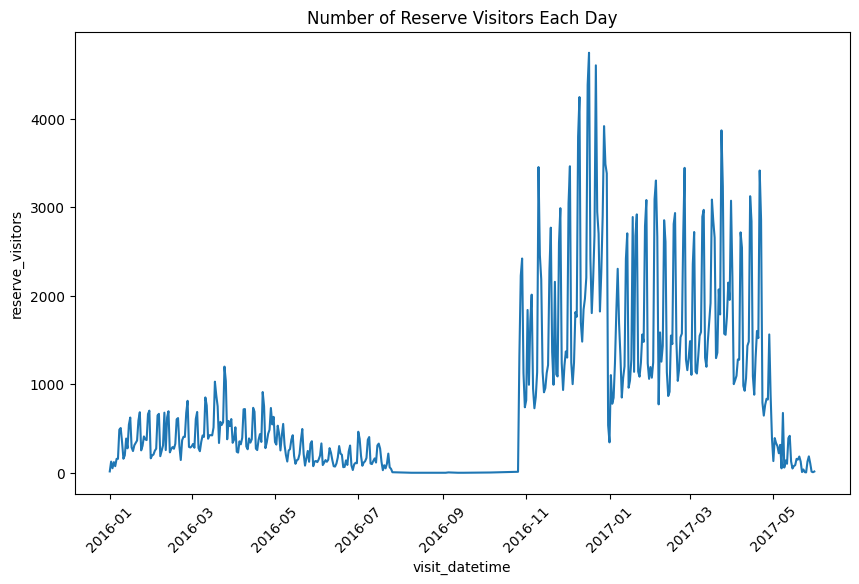

In [87]:
plt.figure(figsize=(10,6))
sns.lineplot(data=air_reserve_df.groupby(air_reserve_df["visit_datetime"].dt.date)["reserve_visitors"].sum().reset_index(), x="visit_datetime", y="reserve_visitors")
plt.xticks(rotation=30)
plt.title("Number of Reserve Visitors Each Day")
plt.show()

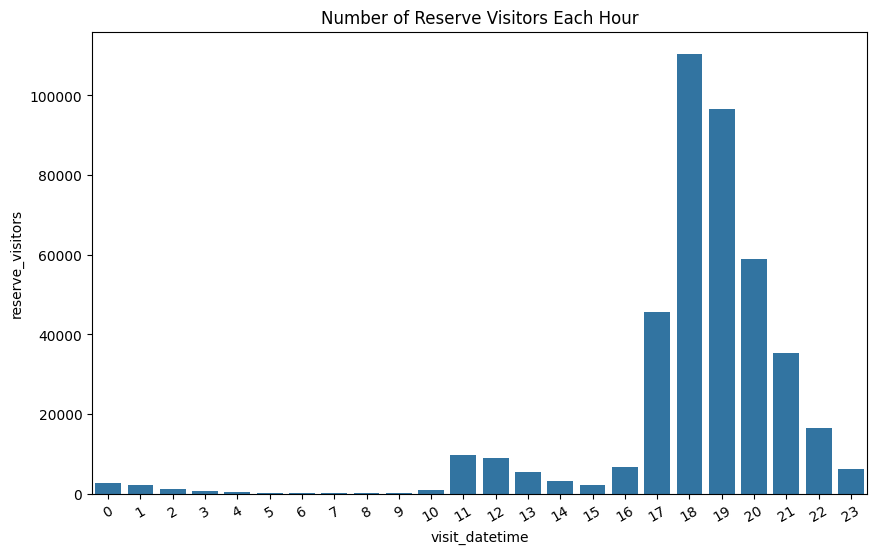

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(data=air_reserve_df.groupby(air_reserve_df["visit_datetime"].dt.hour)["reserve_visitors"].sum().reset_index(), x="visit_datetime", y="reserve_visitors")
plt.xticks(rotation=30)
plt.title("Number of Reserve Visitors Each Hour")
plt.show()

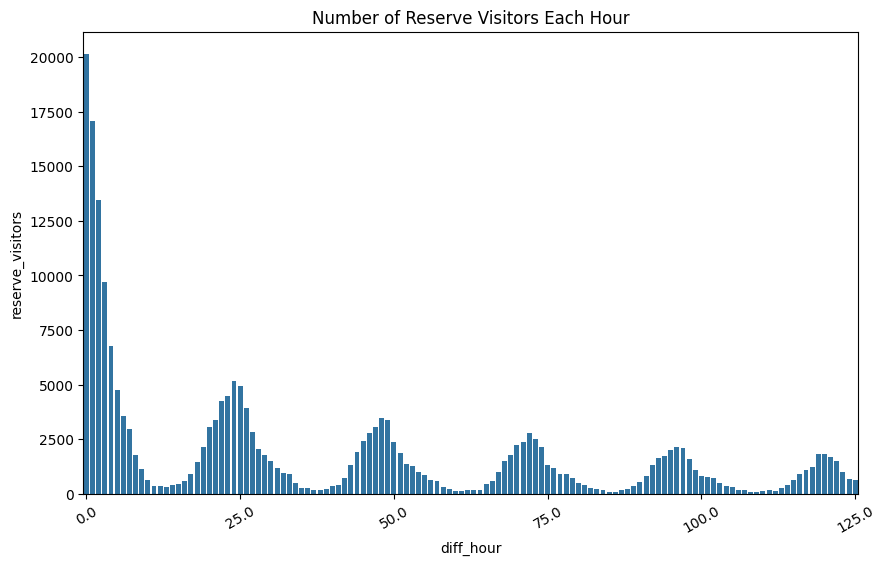

In [104]:
air_reserve_df["diff_hour"] = (air_reserve_df["visit_datetime"] - air_reserve_df["reserve_datetime"]).dt.total_seconds() / 3600
air_reserve_filtered = air_reserve_df[(air_reserve_df["diff_hour"] <= 125)] 

plt.figure(figsize=(10,6))
sns.barplot(data=air_reserve_filtered.groupby(air_reserve_filtered["diff_hour"])["reserve_visitors"].sum().reset_index(), x="diff_hour", y="reserve_visitors")
plt.xticks(rotation=30)
plt.xticks(range(0, 126, 25))
plt.title("Number of Reserve Visitors Each Hour")
plt.show()

3. Dates

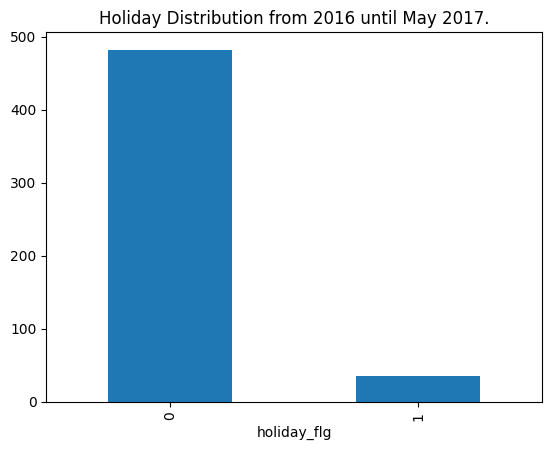

In [13]:
date_info_df["holiday_flg"].value_counts().plot(kind="bar")
plt.title("Holiday Distribution from 2016 until May 2017.")
plt.show()

We are also interested in the holiday distribution for each month in 2016: Do some months have more holidays than others in 2016?

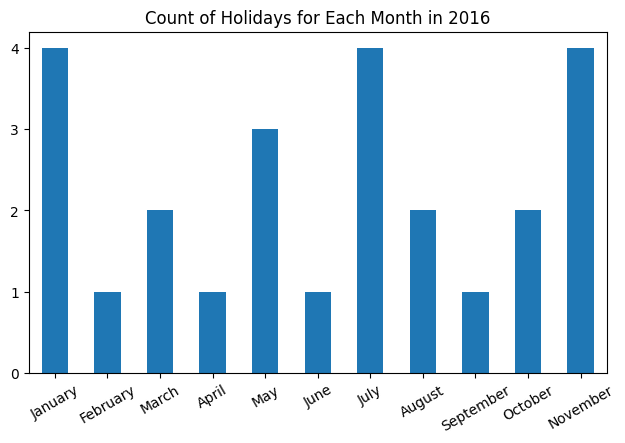

In [44]:
# filter the dataset to contain date info for holidays in 2016 only
date_info_2016 = date_info_df[(date_info_df['calendar_date'].dt.year == 2016) & (date_info_df['holiday_flg'] == 1)]

# group the data by month and count the occurrences
holidays_by_month = date_info_2016.groupby(date_info_2016['calendar_date'].dt.month).size()

# plot the counts for each month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
holidays_by_month.index = months[:len(holidays_by_month)] 
holidays_by_month.plot(kind='bar')
plt.title('Count of Holidays for Each Month in 2016')
plt.tight_layout()
plt.xticks(rotation=30)
plt.yticks(range(0,5))
plt.show()